# Question 10

In [1]:
library('ISLR')

## Ans(a)

In [2]:
Weekly[1:5,]

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up


In [3]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [4]:
attach(Weekly)

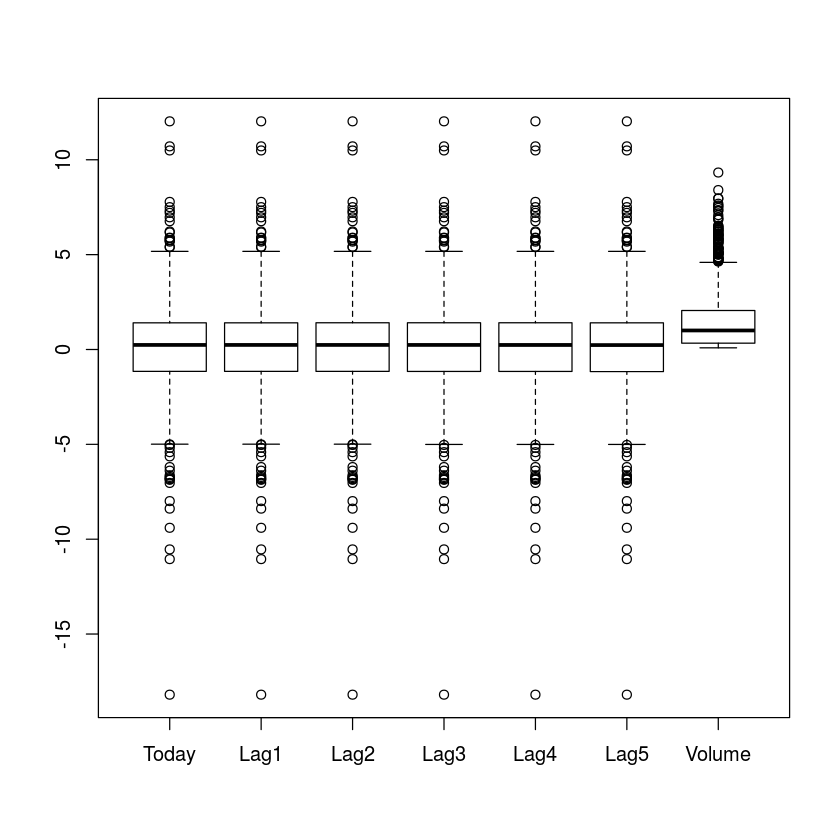

In [5]:
boxplot(Weekly[,c('Today','Lag1','Lag2','Lag3','Lag4','Lag5','Volume')])

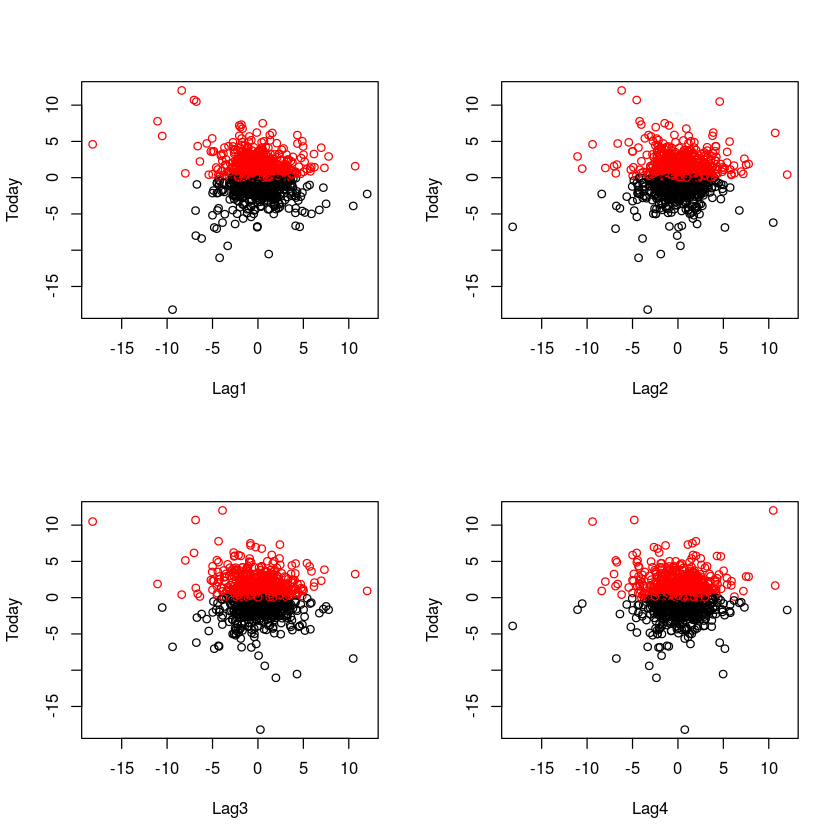

In [6]:
par(mfrow=c(2,2))
plot(Lag1,Today,col=Direction)
plot(Lag2,Today,col=Direction)
plot(Lag3,Today,col=Direction)
plot(Lag4,Today,col=Direction)

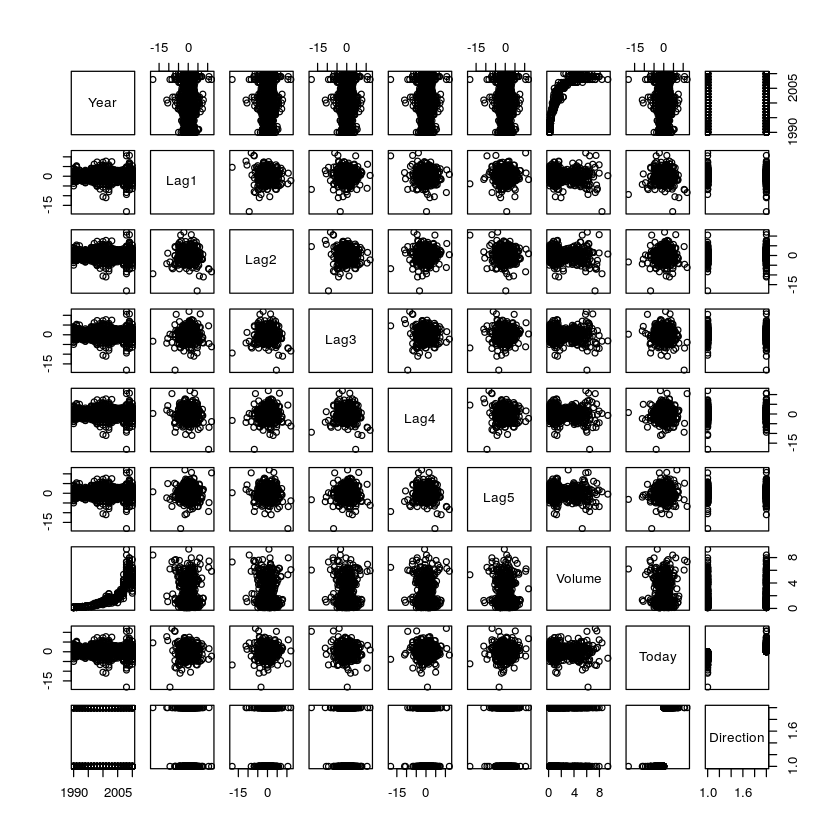

In [7]:
pairs(Weekly)

In [8]:
It seems that predictors follows Gaussian Distribution.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: It seems
       ^


## Ans(b)

In [14]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Weekly, family='binomial')
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag2 seems to be statistically significant as p-value corrsponding to this is less than 0.05.

## Ans(c)

In [18]:
contrasts(Direction)

,Up
Down,0
Up,1


In [21]:
glm.prob=predict(glm.fit,Weekly, type="response")
glm.pred = rep("Down",1089)
glm.pred[glm.prob>0.5] = "Up"
table(glm.pred,Direction)

        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [82]:
Total_training_error_rate = (430+48)/1089
Total_training_error_rate

[1] 0.4389348

In [27]:
# % of Up correctly predicted
# This is also known as recall
Sensitivity = (557/(557+48))*100
Sensitivity

[1] 92.06612

In [26]:
# % of non-up (Down) correctly predicted
Specifity = (54/(54+430))*100
Specifity

[1] 11.15702

In [31]:
# False Positive Rate = FP/N
False_Positive_Rate = (430/(54+430))*100

#True Positive Rate = TP/P
True_Positive_Rate = (557/(48+557))*100

#Pos. Prediction Value = TP/P*
Pos_Prediction_Value = (557/(430+557))

#Neg Prediction Value = TN/N*
Neg_Prediction_Value = ((54)/(54+48))


In [53]:
paste('False Positive Rate=', False_Positive_Rate, '%')
paste('True Positive Rate=',True_Positive_Rate, '%')
paste('Pos Prediction Value', Pos_Prediction_Value)
paste('Neg Prediction Value', Neg_Prediction_Value)

[1] "False Positive Rate= 88.8429752066116 %"

[1] "True Positive Rate= 92.0661157024793 %"

[1] "Pos Prediction Value 0.564336372847011"

[1] "Neg Prediction Value 0.529411764705882"

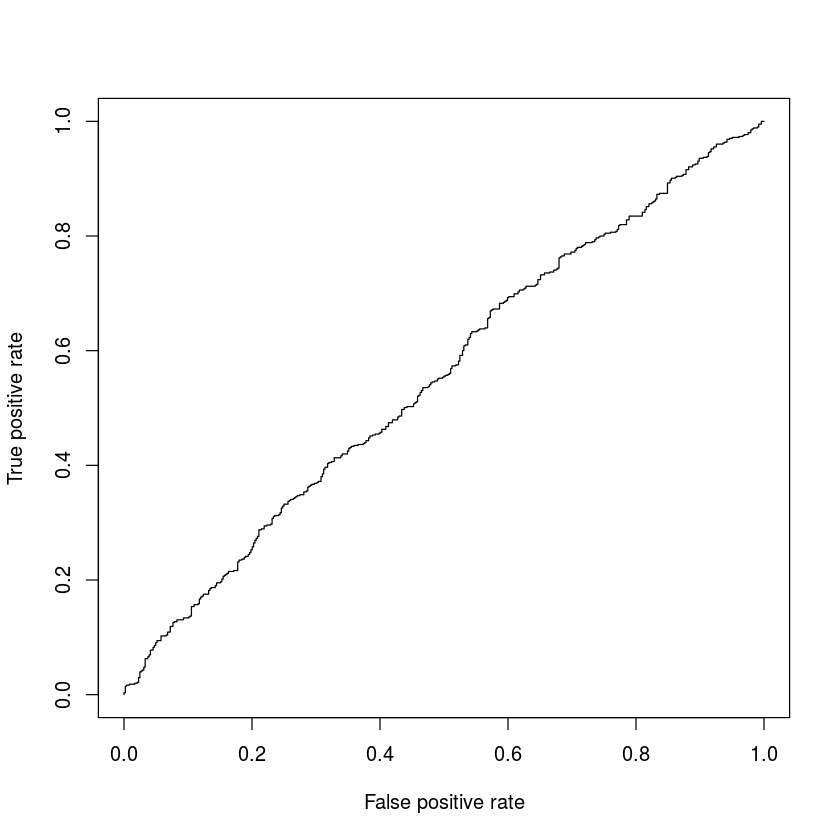

In [52]:
library('ROCR')
pred= prediction(glm.prob,Direction)
perf = performance(pred,"tpr","fpr") # Specifity vs 1-Specifity
plot(perf)

In [51]:
auc = performance(pred,"auc")
auc

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.5536985


Slot "alpha.values":
list()


This claffication model is certainly not good, as AUROC is 0.55 only ans ROC curve not hugging top left corner.

### Insights

##### 1) 92 % of the time model will tell that stock will go up, when it will actually go up.
##### 2) only 11% of the time this model will tell that stock will go down, when it will actually go dowm.
##### 3) 88% of the time the model will tell the stock will go up, but actually it will go down.
##### 4) Only 56 % fo the time stock will actually go up, when our model will say it will go up.
##### 5) Only 52% of the time stock will go down, when this model say it will go down.

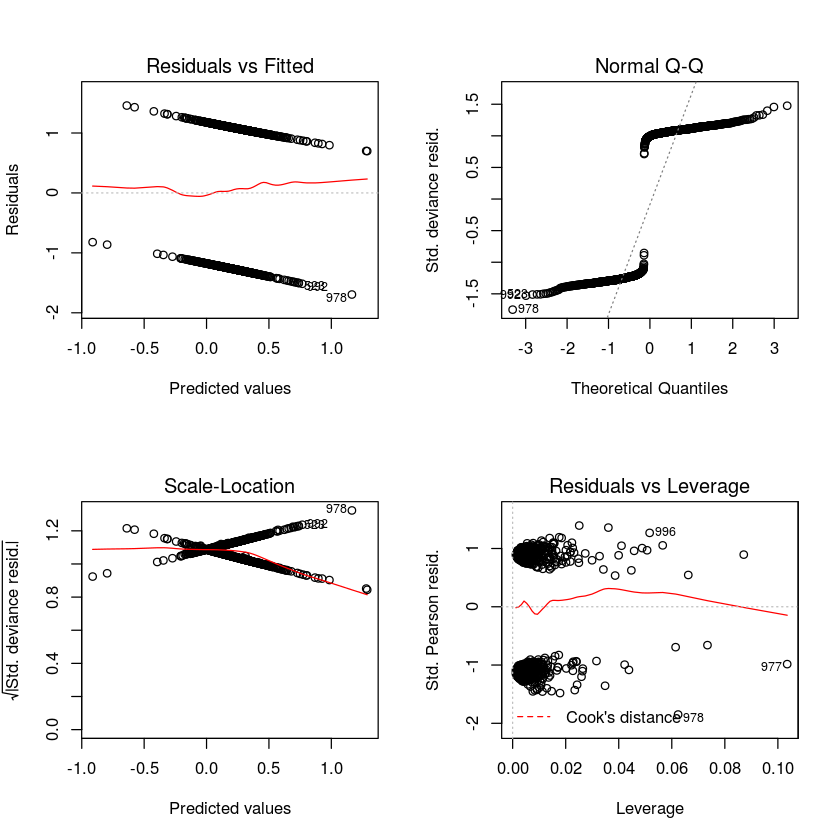

In [54]:
par(mfrow=c(2,2))
plot(glm.fit)

## Ans(c)

In [59]:
weekly.training = Weekly[Weekly$Year<=2008,]
weekly.test = Weekly[Weekly$Year>2008,]

In [61]:
glm.fit = glm(Direction~Lag2, data=weekly.training, family="binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = weekly.training)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [73]:
glm.prob = predict(glm.fit,weekly.test)
glm.pred = rep("Down",nrow(weekly.test))
glm.pred[glm.prob>0.5] = "Up"
glm.pred

[1] "Down" "Up"   "Down" "Down" "Down" "Down" "Up"   "Down" "Down" "Down"
 [11] "Down" "Up"   "Down" "Up"   "Down" "Down" "Down" "Down" "Down" "Up"  
 [21] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Up"  
 [31] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
 [41] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
 [51] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
 [61] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
 [71] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
 [81] "Up"   "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
 [91] "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down" "Down"
[101] "Down" "Down" "Down" "Down"

In [74]:
table(glm.pred,weekly.test$Direction)

        
glm.pred Down Up
    Down   41 56
    Up      2  5

In [83]:
Total_test_error_rate = (2+56)/104
Total_test_error_rate

[1] 0.5576923

In [79]:
Sensitivity = (5/(56+5))*100
Specifity = (41/(41+2))*100

paste('Sensitivity=',Sensitivity)
paste('Specifity=',Specifity)

[1] "Sensitivity= 8.19672131147541"

[1] "Specifity= 95.3488372093023"

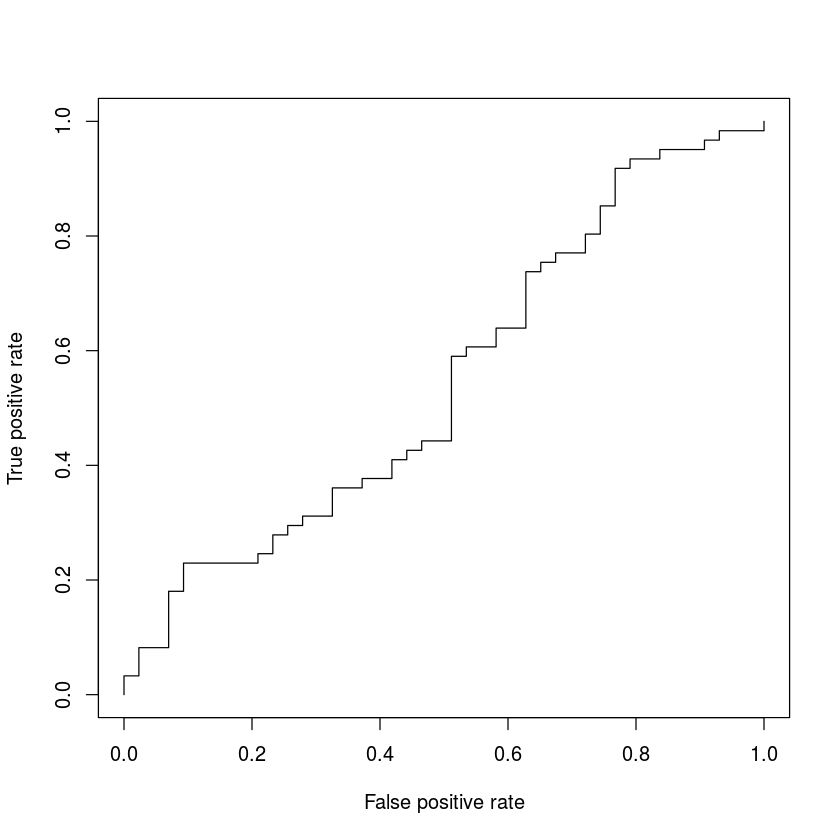

In [75]:
roc.pred = prediction(glm.prob,weekly.test$Direction)
roc.perf = performance(roc.pred,"tpr","fpr")
plot(roc.perf)

In [78]:
roc.auc = performance(roc.pred,"auc")
roc.auc

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.546321


Slot "alpha.values":
list()


#### This classifier is also not good as it has low sensitivity.

## Ans(e)

In [85]:
library('MASS')

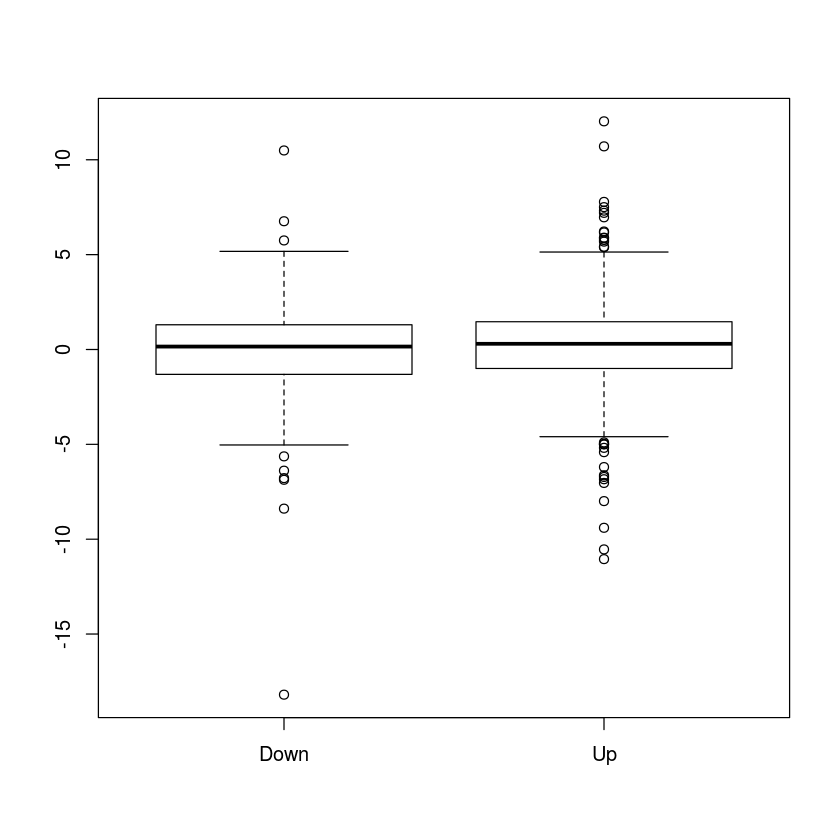

In [92]:
boxplot(Lag2~Direction, data=Weekly)

In [98]:
lda.fit = lda(Direction~Lag2, data=weekly.training)
lda.fit

Call:
lda(Direction ~ Lag2, data = weekly.training)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

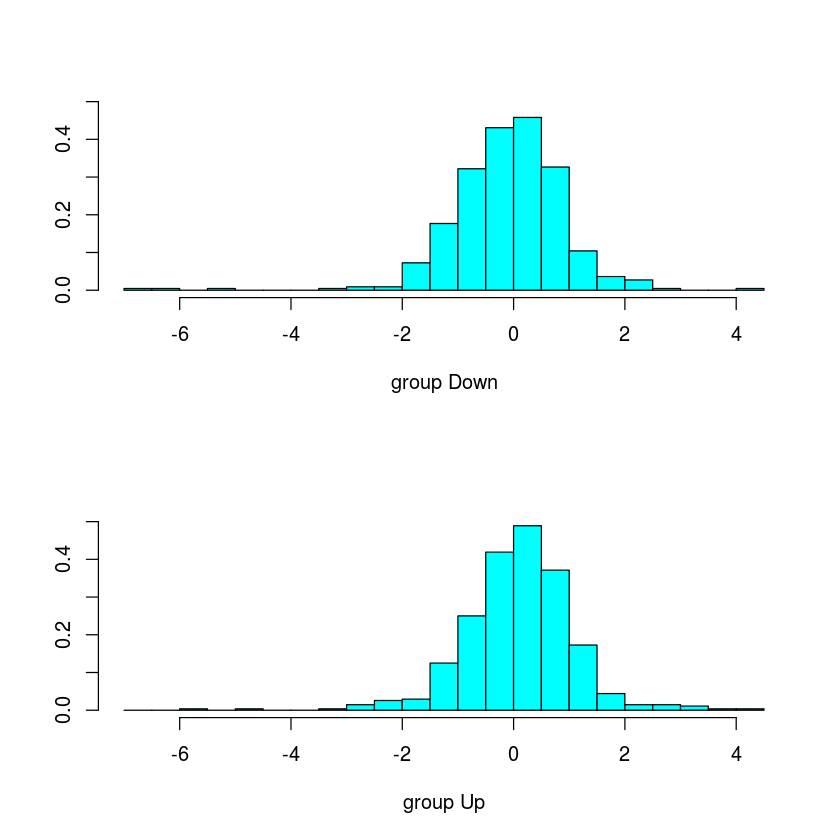

In [97]:
plot(lda.fit)

In [102]:
lda.pred = predict(lda.fit,weekly.test)
lda.pred$class

[1] Up   Up   Down Down Up   Up   Up   Down Down Down Down Up   Up   Up   Up  
 [16] Up   Up   Up   Up   Up   Down Up   Up   Up   Up   Up   Up   Up   Up   Up  
 [31] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down
 [46] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Up   Up  
 [61] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Down Up   Down Up  
 [76] Up   Up   Up   Down Down Up   Up   Up   Up   Up   Down Up   Up   Up   Up  
 [91] Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up   Up  
Levels: Down Up

In [103]:
table(lda.pred$class, weekly.test$Direction)

      
       Down Up
  Down    9  5
  Up     34 56

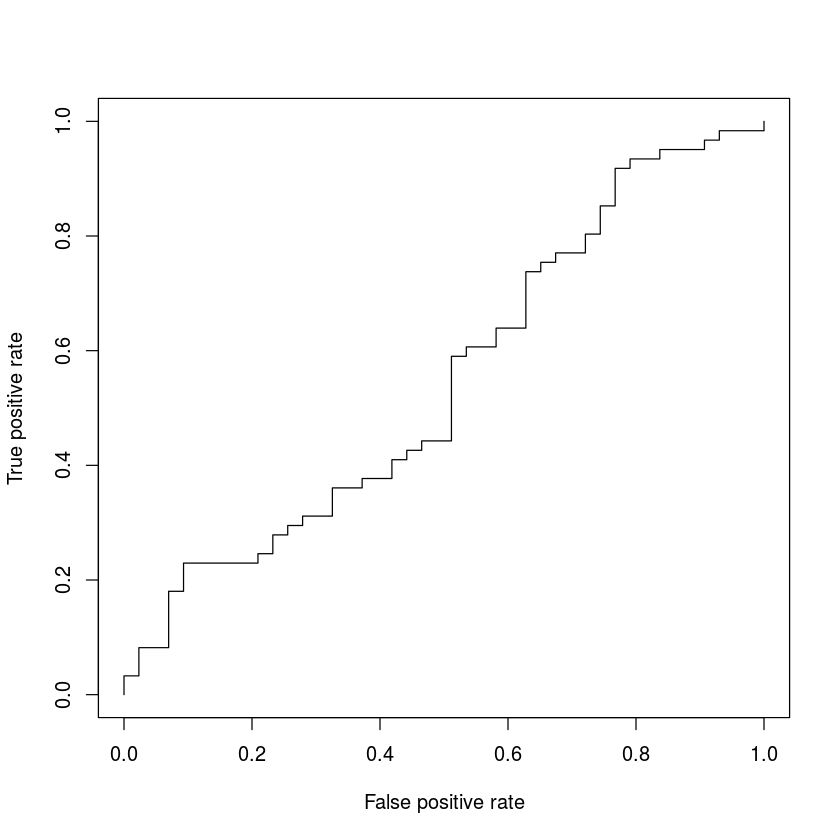

In [110]:
lda.roc.pred = prediction(lda.pred$posterior[,2],weekly.test$Direction)
lda.roc.perf = performance(lda.roc.pred,"tpr","fpr")
plot(lda.roc.perf)

In [111]:
lda.roc.auc = performance(lda.roc.pred,"auc")
lda.roc.auc

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.546321


Slot "alpha.values":
list()


## Ans(f)

In [112]:
qda.fit = qda(Direction~Lag2, data=weekly.training)
qda.fit

Call:
qda(Direction ~ Lag2, data = weekly.training)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [115]:
qda.pred = predict(qda.fit,weekly.test)
table(qda.pred$class,weekly.test$Direction)

      
       Down Up
  Down    0  0
  Up     43 61

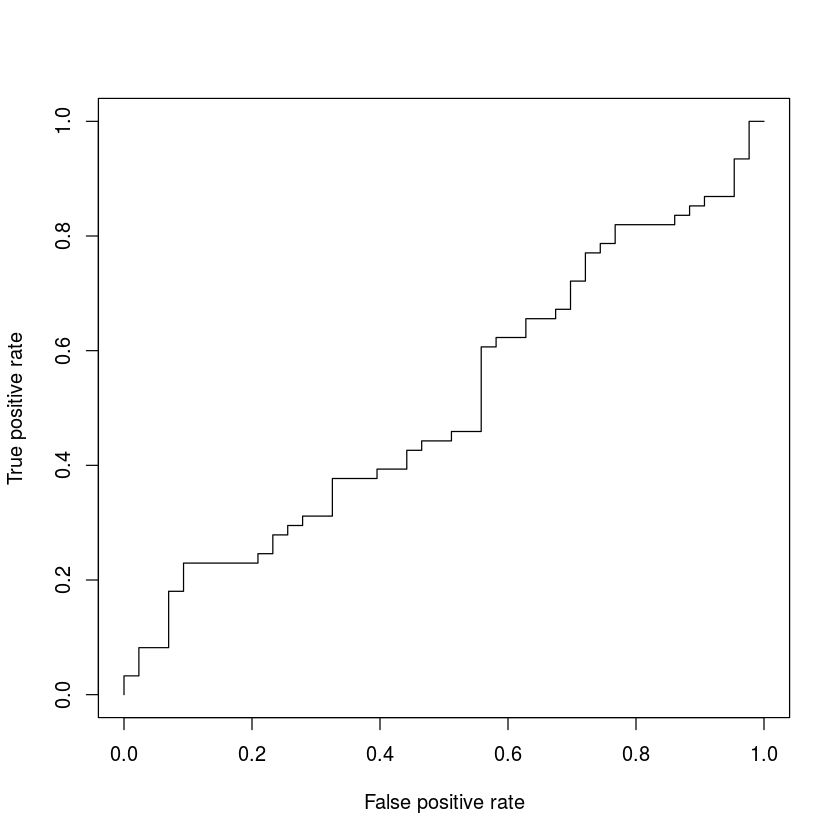

In [119]:
qda.roc.pred = prediction(qda.pred$posterior[,2],weekly.test$Direction)
qda.roc.perf = performance(qda.roc.pred,"tpr","fpr")
plot(qda.roc.perf)

In [120]:
qda.roc.auc = performance(qda.roc.pred,"auc")
qda.roc.auc

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.508578


Slot "alpha.values":
list()


## Ans(g)

In [121]:
library('class')

In [135]:
set.seed(1)
knn.pred = knn(data.frame(weekly.training$Lag2),data.frame(weekly.test$Lag2), weekly.training$Direction,k=1)
table(knn.pred,weekly.test$Direction)

        
knn.pred Down Up
    Down   21 30
    Up     22 31

In [136]:
Sensitivity = (31/(30+31))*100
Specifity = (21/(21+22))*100

paste('Sensitivity=',Sensitivity,'%')
paste('Specifity=',Specifity,'%')

[1] "Sensitivity= 50.8196721311475 %"

[1] "Specifity= 48.8372093023256 %"

## Ans(h)

In [137]:
# Calculate using F-Score
# Precision = Pos. Prediction Rate
# Recall = Sensitivity/ True positive Rate

# F-Score = 2 x (Precision x Recall) / (precision + Recall) 

## Ans(i)